# Welcome to Hello Neural Networks
In this project I implement a multilayer perceptron on the MNIST dataset, without the use of any tensorflow or pytorch to build the models, or following along some tutorial resource.

>Note: Almost all of the math implemented in this project has been learnt with the help of the Andrew NG course on deep learning specialization. I highly recommend you to check it out on coursera.



In [ ]:
''' This is a basic neural network developed from scratch, which can recognize handwritten digits from the MNIST dataset'''
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import time

ohe = preprocessing.OneHotEncoder()
(X_train,Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Basic Structure and Training of the Model
Throughout the model a dictionary "paras" is passed around all functions which contains all the parameters of the model.
The model function runs the training of the model.

In [ ]:
(X_train,Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
n0 = np.shape(X_train[0])[0]*np.shape(X_train[0])[1]
n1 = 16
n2 = 10


X_train_final = X_train.reshape(X_train.shape[0],-1).T

X_test_final = X_test.reshape(X_test.shape[0],-1).T
Y_train_temp = Y_train.reshape(-1, 1)
Y_test_temp = Y_test.reshape(-1, 1)
# Y_train_temp = Y_train.reshape(1,Y_train.shape[0])
# Y_test_temp = Y_test.reshape(1,Y_test.shape[0])
ohe.fit(Y_train_temp)
Y_train_final = ohe.transform(Y_train_temp).toarray().T
# print(Y_train_final[:,335])
# print(Y_train_temp[335])

# Fit and transform testing data
ohe.fit(Y_test_temp)
Y_test_final = ohe.transform(Y_test_temp).toarray().T
# print(Y_train_final.shape)
# print(Y_train_final[0][0])
# from tensorflow.keras.utils import to_categorical
# Y_train_final= to_categorical(Y_train_final).reshape(10,Y_train.shape[0])
# print(Y_train_final[:, 1])
# print(Y_train_final.shape)

def prep(n2 = 10,n1 = 16, n0 = np.shape(X_train[0])[0]*np.shape(X_train[0])[1]):
  W1 = np.random.randn(n1,n0)*0.1
  B1 = np.zeros((n1,1))
  W2 = np.random.randn(n2,n1)*0.1
  B2 = np.zeros((n2,1))
  paras = {
      "W1" : W1,
      "W2" : W2,
      "B1" : B1,
      "B2" : B2,
      "m" : X_train.shape[0]
  }
  return paras


def forward(paras, X = X_train_final):
  W1 = paras["W1"]
  W2 = paras["W2"]
  B1 = paras["B1"]
  B2 = paras["B2"]
  Z1 = np.dot(W1,X) + B1
  
  A1 = np.tanh(Z1)
  
  Z2 = np.dot(W2,A1) +B2
  
  A2 = 1/(1+np.exp(-Z2))
  
  
  
  paras["Z1"] =Z1
  paras["Z2"] =Z2
  paras["A1"] =A1
  paras["A2"] =A2
  return paras
  

def cost(paras,Y = Y_train_final):
  #check if this is correct
  A2 = paras["A2"]
  m = paras["m"]
  # print("reached")
  # # cost = -(1/m)*(np.dot(Y.T,np.log(A2))+np.dot((1-Y).T,np.log(1-A2)))
  # print(cost)
  # cost = float(np.squeeze(cost))
  # logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
  logprobs = np.multiply(Y,np.log(A2))+np.multiply(1-Y,np.log(1-A2))
  cost = -(1/m)*np.sum(logprobs)
    ### END CODE HERE ###
  
  cost = float(np.squeeze(cost))
  paras["cost"] = cost
  return paras

def backward(paras,X = X_train_final,Y = Y_train_final):
  A2 = paras["A2"]
  A1 = paras["A1"]
  W2 = paras["W2"]
  W1 = paras["W1"]
  m = paras["m"]
  dZ2 = np.subtract(A2,Y)
  
  dW2 = (1/m)*(np.dot(dZ2,A1.T))
  dB2 = (1/m)*(np.sum(dZ2,axis = 1,keepdims = True))
  # dZ1 = np.multiply(np.dot(W2.T,dZ2),1-np.power(A1,2))
  

  
  dZ1 = np.dot(W2.T, dZ2)*(1 - np.power(A1, 2))
  dW1 = (1/m)*(np.dot(dZ1,X.T))
  dB1 = (1/m)*(np.sum(dZ1,axis = 1,keepdims = True))
  paras["dW1"] = dW1
  paras["dW2"] = dW2
  paras["dB1"] = dB1
  paras["dB2"] = dB2
  
  return paras

def update(paras):
  lr = 0.06
  dW1 = paras["dW1"]
  dW2 = paras["dW2"]
  dB1 = paras["dB1"]
  dB2 = paras["dB2"]
  W1 = paras["W1"]
  W2 = paras["W2"]
  B1 = paras["B1"]
  B2 = paras["B2"]
  W1 = W1 - lr*dW1
  W2 = W2 -lr*dW2
  B1 = B1 -lr*dB1
  B2 = B2 - lr*dB2
  paras["W1"] =W1
  paras["W2"] =W2
  paras["B1"] =B1
  paras["B2"] =B2
  
  return paras
def model(n2 = 10,n1 = 16, n0 = np.shape(X_train[0])[0]*np.shape(X_train[0])[1],iter = 5000):
  paras = prep()
  start = time.time()
  for i in range(iter):
    paras = forward(paras)
    paras = cost(paras)
    c = paras["cost"]
    paras = backward(paras)
    paras = update(paras)
   
    if  i % 500 == 0:
      
      print("Cost after iteration %i: %f" %(i, c))
  end = time.time()
  print(f"Learning time of the program is {end - start}")
  return paras

trained_vals = model()


Cost after iteration 0: 7.115943
Cost after iteration 500: 1.611916
Cost after iteration 1000: 1.293188
Cost after iteration 1500: 1.162978
Cost after iteration 2000: 1.032402
Cost after iteration 2500: 0.973768
Cost after iteration 3000: 0.934175
Cost after iteration 3500: 0.901273
Cost after iteration 4000: 0.880159
Cost after iteration 4500: 0.863200
Learning time of the program is 2387.7228178977966


# Testing and Saving Trained Model
The predict function tests the model and gives the accuracy on the testing dataset.

As I have not used a model class in the script, I save the data by saving the trained parameters in a csv file loaded onto the mounted google drive.

The load_paras function automatically loads these csv files back to the model according to the naming convention.



In [ ]:
#0.0001 -- > 53%
#0.0009 --> 79%
#0.09 --> 87.68% (TOO LARGE)
#0.03 -- > 84.49% 
#0.06 --> 89.98% (can be increased)
#0.07 -> 87.15%
#0.05 --> 88.43%

def save_paras(paras,accuracy = 89):
  W1 = paras["W1"]
  W2 = paras["W2"]
  B1 = paras["B1"]
  B2 = paras["B2"]
  np.savetxt(f'/content/gdrive/MyDrive/NeuralNetworkValues/W1_{accuracy}.csv', W1, delimiter=',')
  np.savetxt(f'/content/gdrive/MyDrive/NeuralNetworkValues/W2_{accuracy}.csv', W2, delimiter=',')
  np.savetxt(f'/content/gdrive/MyDrive/NeuralNetworkValues/B1_{accuracy}.csv', B1, delimiter=',')
  np.savetxt(f'/content/gdrive/MyDrive/NeuralNetworkValues/B2_{accuracy}.csv', B2, delimiter=',')

def load_paras(accuracy = 84):
  W1 = np.loadtxt(f'/content/gdrive/MyDrive/NeuralNetworkValues/W1_{accuracy}.csv', delimiter=',')
  W2 = np.loadtxt(f'/content/gdrive/MyDrive/NeuralNetworkValues/W2_{accuracy}.csv', delimiter=',')
  B1 = np.loadtxt(f'/content/gdrive/MyDrive/NeuralNetworkValues/B1_{accuracy}.csv', delimiter=',').reshape(n1,1)
  B2 = np.loadtxt(f'/content/gdrive/MyDrive/NeuralNetworkValues/B2_{accuracy}.csv', delimiter=',').reshape(n2,1)
  paras = {
      "W1":W1,
      "W2":W2,
      "B1":B1,
      "B2":B2
  }
  return paras
def predict(paras):
  
  predicted = forward(paras,X_test_final)
  A2 = predicted["A2"]
  tests = Y_test_final.shape[1]
  print("Number of test cases: ", tests)
  final = (A2 == A2.max(axis=0)[None,:]).astype(int)
  correct = 0
  incorrect = []
  for i in range(tests):
    if(np.array_equal(final[:,i], Y_test_final[:,i])):
      correct += 1
    else:
      incorrect.append(i)
  accuracy = correct/tests*100
  print(f"Accuracy is: {accuracy} %")
  print(f"Incorrect test cases are: ", incorrect)
  save_paras(paras,int(accuracy))
  return final


  
  
  

final = predict(trained_vals)

Number of test cases:  10000
Accuracy is: 85.86 %
Incorrect test cases are:  [8, 18, 33, 38, 62, 63, 66, 72, 73, 80, 104, 111, 118, 119, 125, 132, 149, 150, 151, 193, 195, 214, 217, 221, 233, 241, 244, 245, 247, 257, 259, 268, 274, 282, 313, 318, 320, 336, 340, 341, 344, 349, 352, 353, 359, 362, 366, 376, 381, 389, 391, 421, 435, 445, 448, 457, 460, 464, 465, 468, 478, 479, 495, 497, 498, 502, 505, 507, 511, 514, 515, 527, 528, 530, 531, 543, 551, 552, 553, 565, 569, 571, 578, 591, 593, 595, 597, 606, 610, 618, 619, 627, 628, 638, 658, 659, 667, 674, 684, 689, 691, 692, 710, 717, 720, 730, 737, 740, 787, 791, 795, 800, 804, 810, 817, 829, 839, 844, 857, 866, 874, 877, 882, 884, 898, 900, 906, 919, 924, 938, 939, 944, 947, 950, 956, 959, 965, 969, 975, 982, 992, 993, 994, 1000, 1014, 1023, 1024, 1028, 1032, 1033, 1044, 1045, 1050, 1052, 1062, 1078, 1082, 1089, 1093, 1096, 1101, 1107, 1112, 1114, 1119, 1124, 1153, 1154, 1156, 1157, 1181, 1191, 1192, 1194, 1200, 1202, 1204, 1206, 1208, 12

The rest of the code is just testing and playing around :)


[0 0 1 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


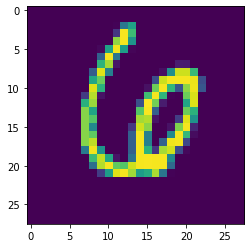

In [ ]:
check = 66
print(final[:,check])
print(Y_test_final[:,check])
plt.imshow(X_test[check])


In [ ]:
save_paras(trained_vals)


In [ ]:
loaded = load_paras(89)


In [ ]:

final = predict(loaded)

Number of test cases:  10000
Accuracy is: 89.98 %
Incorrect test cases are:  [8, 15, 33, 38, 46, 62, 66, 77, 108, 111, 119, 124, 126, 149, 151, 152, 172, 185, 217, 219, 233, 241, 245, 247, 300, 307, 313, 320, 321, 324, 340, 344, 349, 352, 362, 363, 381, 391, 403, 412, 421, 435, 444, 448, 449, 468, 469, 478, 479, 490, 502, 507, 511, 514, 515, 516, 528, 531, 543, 551, 565, 578, 582, 591, 597, 610, 613, 619, 624, 628, 629, 642, 658, 659, 684, 691, 707, 714, 717, 720, 728, 740, 741, 791, 795, 804, 810, 829, 839, 857, 874, 877, 881, 882, 890, 898, 924, 930, 938, 939, 947, 950, 951, 956, 958, 965, 970, 982, 994, 999, 1003, 1012, 1014, 1032, 1033, 1039, 1073, 1079, 1082, 1089, 1093, 1096, 1107, 1112, 1114, 1119, 1156, 1169, 1170, 1178, 1191, 1192, 1194, 1202, 1204, 1206, 1217, 1224, 1226, 1232, 1233, 1234, 1242, 1247, 1248, 1251, 1252, 1256, 1260, 1269, 1272, 1283, 1289, 1308, 1310, 1319, 1320, 1326, 1328, 1331, 1337, 1345, 1364, 1370, 1375, 1378, 1391, 1393, 1404, 1410, 1411, 1413, 1415, 142

[0 0 0 0 0 0 0 0 1 0]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


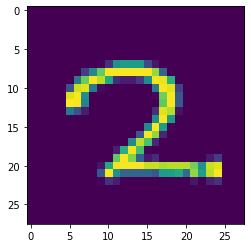

In [ ]:
check = 108
print(final[:,check])
print(Y_test_final[:,check])
plt.imshow(X_test[check])
